In [1]:
## import necessary modules

import numpy as np
import scipy.stats as stats
import statistics
from matplotlib import pyplot as plt

(array([  1.,   1.,   0.,   1.,   1.,   3.,   1.,   1.,   5.,   8.,   0.,
          4.,  10.,   9.,   6.,   5.,  13.,  18.,  20.,  26.,  28.,  37.,
         40.,  38.,  58.,  54.,  69.,  75.,  86.,  97.,  90., 107., 138.,
        146., 172., 183., 200., 202., 207., 227., 213., 225., 259., 259.,
        298., 297., 260., 305., 301., 289., 290., 272., 274., 305., 285.,
        274., 256., 245., 224., 216., 191., 220., 205., 193., 163., 153.,
        158., 124., 101., 115.,  90.,  88.,  83.,  59.,  42.,  42.,  31.,
         38.,  19.,  26.,  20.,  24.,  14.,  11.,  13.,  10.,   3.,  10.,
          3.,   3.,   2.,   1.,   2.,   3.,   1.,   1.,   1.,   2.,   0.,
          1.]),
 array([-2.69071172, -2.61646434, -2.54221696, -2.46796958, -2.3937222 ,
        -2.31947482, -2.24522744, -2.17098006, -2.09673268, -2.0224853 ,
        -1.94823793, -1.87399055, -1.79974317, -1.72549579, -1.65124841,
        -1.57700103, -1.50275365, -1.42850627, -1.35425889, -1.28001151,
        -1.20576413, -1.13

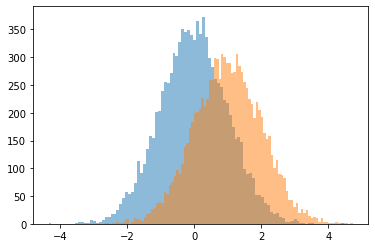

In [15]:
variance, noiseMean, signalMean = 1, 0, 1

noise_samples = np.random.randn(10000)
plt.hist(noise_samples, alpha = 0.5, bins = 100)
plt.hist(np.random.randn(10000)+signalMean, alpha = 0.5, bins = 100)

In [2]:
## define mean, variance of signal and noise
variance, noiseMean, signalMean = 1, 0, 1
# dprime = (signalMean - noiseMean) / np.sqrt(variance)

## define the criterion for decision making
criterionList = np.linspace(-3, 3, 100)
## number of trials
nTrials = 1000
C = len(criterionList)

In [3]:
## probability of correct rejection (pCR)
## probability of target hit (pHit)
## estimated dprime
pCR  = np.zeros(C)
pHit = np.zeros(C)
# pFA  = np.zeros(C)
# pMiss = np.zeros(C)
dPrimeEst = np.zeros(C)

In [9]:
for criterionNum in range(C):
    criterion = criterionList[criterionNum]
    ## randomly generate stimulation 0 (noise) or 1 (signal)
    stim = np.zeros(nTrials)
    stim[np.random.rand(nTrials)>0.5] = 1
#     stim = np.floor(np.linspace(0.5,1.5,num=nTrials))
#     np.random.shuffle(stim)
#     temp = np.floor(np.linspace(0.5,1.5,num=nTrials))
#     stim = temp[np.random.permutation(range(nTrials))]
    
    ## initialization of response and internal response
    resp = np.zeros(nTrials)
    internalResponse = np.zeros(nTrials)
    
    for t in range(nTrials):
        if stim[t] == 0:  ## no signal, only noise
            internalResponse[t] = np.random.randn(1)*np.sqrt(variance)+noiseMean
#             internalResponse[t] = np.random.normal(noiseMean, np.sqrt(variance), 1)
        else:  ## signal
            internalResponse[t] = np.random.randn(1)*np.sqrt(variance)+signalMean
        ## decide the response
        resp[t] = internalResponse[t] > criterion
        
    ## Actual (from simulation experiment) probability of correct Rejection
    pCR[criterionNum] = sum(np.logical_and(resp==0, stim==0)) / sum(stim==0)
    if pCR[criterionNum]==0.0 or pCR[criterionNum]==1.0:
        zCR = np.nan
    else:  ## Calculate z-score of Correct Rejection probability using inverted cumulative Gaussian
        zCR = statistics.NormalDist().inv_cdf(pCR[criterionNum])
        
    ## Actual (from simulation experiment) probability of Hits 
    pHit[criterionNum] = sum(np.logical_and(resp==1, stim==1)) / sum(stim==1)
#     pFA[criterionNum] = sum(np.logical_and(resp==1, stim==0)) / sum(stim==0)
#     pMiss[criterionNum] = sum(np.logical_and(resp==0, stim==1)) / sum(stim==1)
    if pHit[criterionNum]==0.0 or pHit[criterionNum]==1.0:
        zHit = np.nan
    else: ## Calculate z-score of Correct Rejection probability using inverted cumulative Gaussian
        zHit = statistics.NormalDist().inv_cdf(pHit[criterionNum])
        
    ## Actual (from simulation experiment) d' from simulation   
    dPrimeEst[criterionNum] = zCR + zHit
        
        

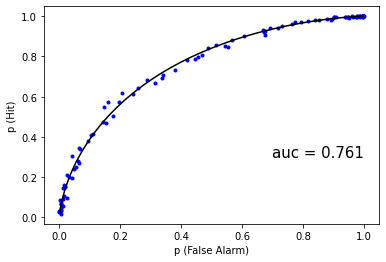

In [10]:
# Display results step-by-step
dPrime = (signalMean - noiseMean) / np.sqrt(variance)
## Actual (from simulation experiment) probability of False Alarm
pFA = 1 - pCR

## Theoretical probability of Hits and False Alarm for criterionList
pHitReal = np.array([1 - statistics.NormalDist(signalMean, np.sqrt(variance)).cdf(val) for val in criterionList])
pFAReal = np.array([1 - statistics.NormalDist(noiseMean, np.sqrt(variance)).cdf(val) for val in criterionList])

## use np.trapz for calculation of area under ROC curve for the actual case
area_under_curve = np.trapz(sorted(pHit), sorted(pFA))
plt.plot(pFA, pHit, 'b.')
## For theoretical ROC curve
plt.plot(pFAReal, pHitReal, 'k')
plt.xlabel('p (False Alarm)')
plt.ylabel('p (Hit)')
plt.text(0.7, 0.3, 'auc = {:04.3f}'.format(area_under_curve), size=15)
plt.show()


0.7444505970724191


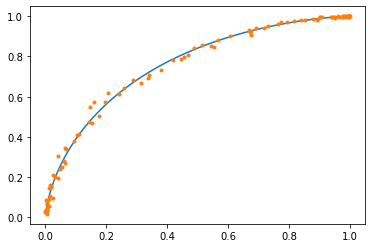

In [11]:
## Do the same thing with using modules from sklearn, metrics.roc_curve
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(stim, internalResponse, pos_label=1)
plt.plot(sorted(pFAReal),sorted(pHitReal))
plt.plot(pFA, pHit,'.')
## calcualte area under curve using the modules
area_under_curve2 = metrics.auc(sorted(fpr), sorted(tpr))
print(area_under_curve2)
## Compare this result to the previous one